<a href="https://colab.research.google.com/github/priya4328/Classification-Models/blob/main/credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express  as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

In [5]:
df=pd.read_csv('/content/default of credit card clients.xls - Data.csv')

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:

df.shape

(30000, 25)

In [9]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

there are no null value  present in the dataset

## **Now rename the default payment next month to Defaulter**

In [12]:
df = df.rename(columns={'default payment next month': 'Defaulter'})

In [13]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


**Elaboratory Data Analysis**

Check the limit balance remaining in the card

In [14]:
df['LIMIT_BAL'].unique()

array([  20000,  120000,   90000,   50000,  500000,  100000,  140000,
        200000,  260000,  630000,   70000,  250000,  320000,  360000,
        180000,  130000,  450000,   60000,  230000,  160000,  280000,
         10000,   40000,  210000,  150000,  380000,  310000,  400000,
         80000,  290000,  340000,  300000,   30000,  240000,  470000,
        480000,  350000,  330000,  110000,  420000,  170000,  370000,
        270000,  220000,  190000,  510000,  460000,  440000,  410000,
        490000,  390000,  580000,  600000,  620000,  610000,  700000,
        670000,  680000,  430000,  550000,  540000, 1000000,  530000,
        710000,  560000,  520000,  750000,  640000,   16000,  570000,
        590000,  660000,  720000,  327680,  740000,  800000,  760000,
        690000,  650000,  780000,  730000])

In [15]:
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

In [16]:
fig1 = px.histogram(df, x = 'LIMIT_BAL', marginal = 'box',
                    title = 'Distribution of balance limit of card',
                    labels = {'x': 'Dollar($)', 'y': 'Number of card'},
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig1.show()

It is found that limit balance feature is right skewed, middle 50% of value lie between 50K to 240k. few of limit goes beyond 530k in doller

# **Now check the card holders with respect to sex**

In [17]:
df['SEX'].unique()

array([2, 1])

Gender (1 = male; 2 = female)

<ipython-input-18-00180fa65aa6>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'No. of Card Holders')

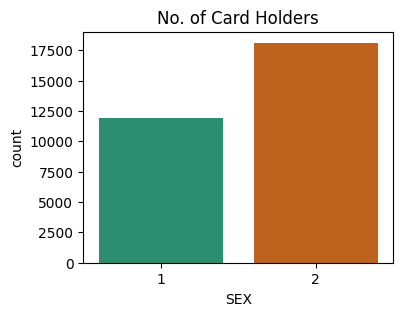

In [18]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='SEX',palette='Dark2')
plt.xlabel('SEX')
plt.title('No. of Card Holders')

There is 17500 female and almost 12500 male have the card

Now find the defaulter by male and female

In [19]:
df['Defaulter'].value_counts()

0    23364
1     6636
Name: Defaulter, dtype: int64

<ipython-input-20-14aec9f7b300>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'No. of Card Defaulters')

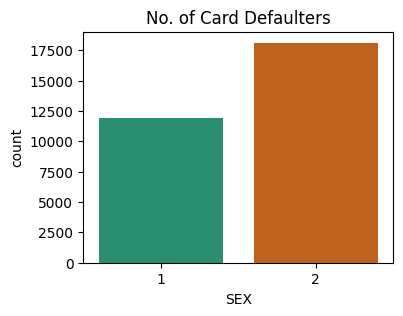

In [20]:
plt.figure(figsize=(4,3))
df1=df[df['Defaulter']==1]
sns.countplot(data=df,x='SEX',palette='Dark2')
plt.xlabel('SEX')
plt.title('No. of Card Defaulters')

Female has more number of defaulter as compare to the male

Distribution of card on the basis of EDUCATION

In [21]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

1 = graduate school; 2 = university; 3 = high school; 4 = others

In [22]:
def edu(x):
  if x in [0,4,5,6]:
    return 4
  else:
    return x
df['EDUCATION']=df.EDUCATION.apply(edu)

In [23]:
df['EDUCATION'].unique()

array([2, 1, 3, 4])

<ipython-input-24-bf7b3f20e950>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'No. of  Card holders')

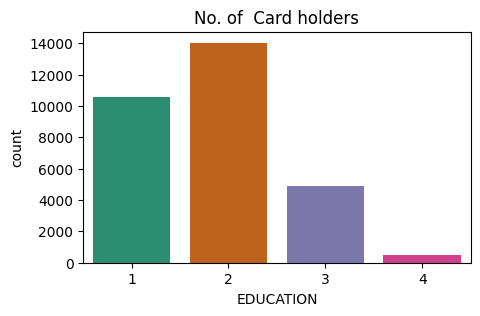

In [24]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='EDUCATION',palette='Dark2')
plt.xlabel('EDUCATION')
plt.title('No. of  Card holders')

Here university persons have maximum numbers of card

In [25]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Defaulter'],
      dtype='object')

MARRIAGE

In [26]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

1 = married; 2 = single; 3 = others

Merge the 0 and 3 in the 3

In [27]:
def MAR(x):
  if x in [0,3]:
    return 3
  else:
    return x
df['MARRIAGE']=df.MARRIAGE.apply(MAR)

<ipython-input-28-921671445905>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'No. of  Card holders  ')

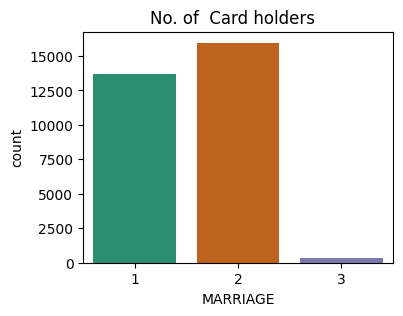

In [28]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='MARRIAGE',palette='Dark2')
plt.xlabel('MARRIAGE')
plt.title('No. of  Card holders  ')

Maximum no of card holders are single person


## **Count number of card holder by Age**

In [29]:
df['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [30]:
fig2 = px.histogram(df, x = 'AGE', marginal = 'box',
                    title = 'Distribution of Age of card holder',
                    labels = {'x': 'Dollar($)', 'y': 'Number of card'},
                   color_discrete_sequence=px.colors.qualitative.D3,
                   nbins = 75)
fig2.update_traces(marker_line_width=1,marker_line_color="white")

fig2.show()

Age feature is also right skewed, middle 50% of age is 26 to 40 years which means mostly working class people use credit card. few people above 60 years of age also uses the credit card.

convert the range of the age

In [31]:
def age(x):
  if x in range(21,41):
    return 1
  elif x in range(41,61):
    return 2
  elif x in range(61,80):
    return 3
df['AGE'] = df['AGE'].apply(age)

In [32]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000,2,2,1,1,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,1,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [33]:
df['AGE']

0        1
1        1
2        1
3        1
4        2
        ..
29995    1
29996    2
29997    1
29998    2
29999    2
Name: AGE, Length: 30000, dtype: int64

<ipython-input-34-b1180f0a9353>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'No. of  Card holders')

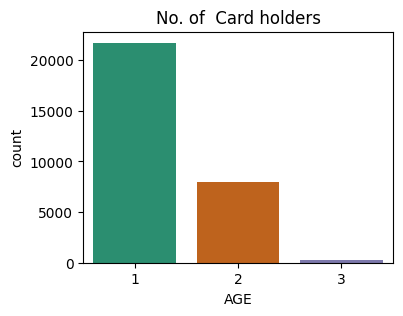

In [34]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='AGE',palette='Dark2')
plt.xlabel('AGE')
plt.title('No. of  Card holders')

PAY0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight - months, 9=payment delay for nine months and above)

PAY2: Repayment status in August, 2005

PAY3: Repayment status in July, 2005

PAY4: Repayment status in June, 2005

PAY5: Repayment status in May, 2005

PAY6: Repayment status in April, 2005

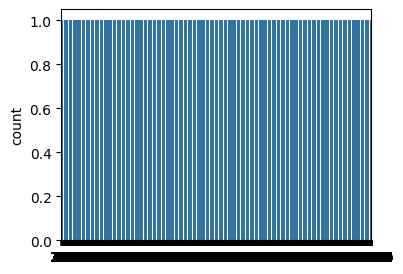

KeyboardInterrupt: 

In [35]:
for i in ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']:
  plt.figure(figsize=(4,3))
  sns.countplot(data=df[i])
  plt.show()

CHECK THE OUTLIER USING BOXPLOT


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3


**Boxplot for Bill_Amt vs Limit_bal**


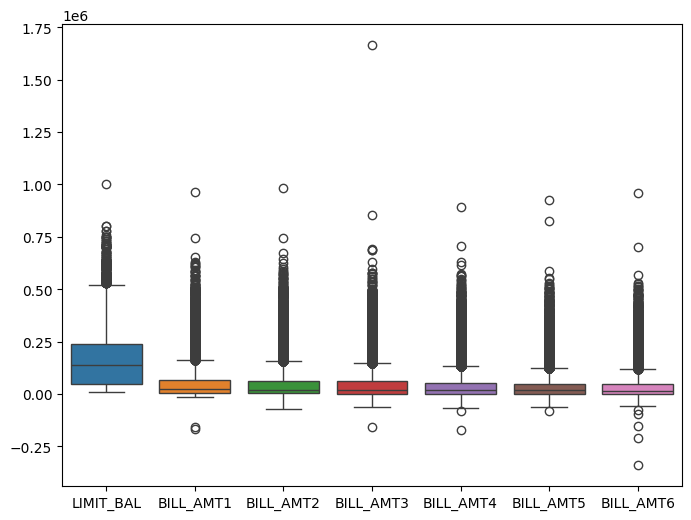

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']])
plt.show()

Boxplot for Pay_Amt vs Limit_bal

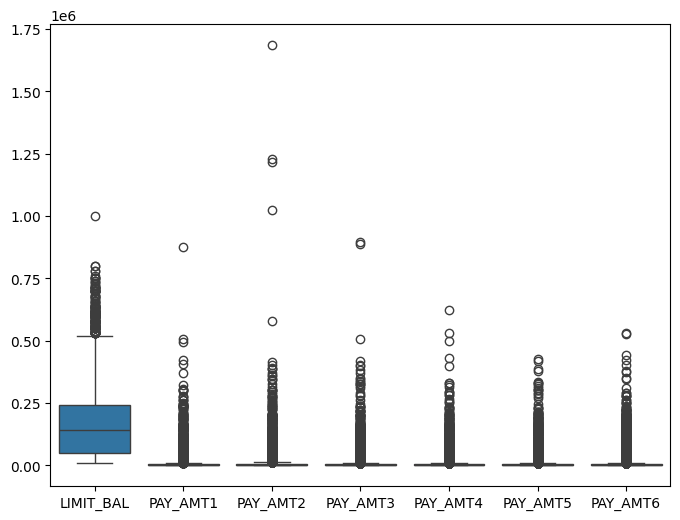

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['LIMIT_BAL','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']])
plt.show()

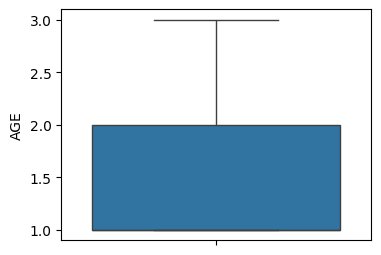

In [41]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df['AGE'])
plt.show()

# **check outlier using IQR method**

In [42]:
# check outlier using IQR method
df_int=df.select_dtypes(exclude='object')
for i in df_int.columns:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)

  IQR = q3-q1
  lower_lim = q1-1.5*IQR
  upper_lim = q3+1.5*IQR

  print('IQR is',IQR)
  print('lower limit is',lower_lim)
  print('upper limit is',upper_lim)
  print('Number of Outliers in',i,' = ',(df_int.shape[0] - df_int[(df_int[i]<upper_lim) & (df_int[i]>lower_lim)].shape[0]))
  print(' ')

IQR is 14999.5
lower limit is -14998.5
upper limit is 44999.5
Number of Outliers in ID  =  0
 
IQR is 190000.0
lower limit is -235000.0
upper limit is 525000.0
Number of Outliers in LIMIT_BAL  =  167
 
IQR is 1.0
lower limit is -0.5
upper limit is 3.5
Number of Outliers in SEX  =  0
 
IQR is 1.0
lower limit is -0.5
upper limit is 3.5
Number of Outliers in EDUCATION  =  468
 
IQR is 1.0
lower limit is -0.5
upper limit is 3.5
Number of Outliers in MARRIAGE  =  0
 
IQR is 1.0
lower limit is -0.5
upper limit is 3.5
Number of Outliers in AGE  =  0
 
IQR is 1.0
lower limit is -2.5
upper limit is 1.5
Number of Outliers in PAY_0  =  3130
 
IQR is 1.0
lower limit is -2.5
upper limit is 1.5
Number of Outliers in PAY_2  =  4410
 
IQR is 1.0
lower limit is -2.5
upper limit is 1.5
Number of Outliers in PAY_3  =  4209
 
IQR is 1.0
lower limit is -2.5
upper limit is 1.5
Number of Outliers in PAY_4  =  3508
 
IQR is 1.0
lower limit is -2.5
upper limit is 1.5
Number of Outliers in PAY_5  =  2968
 
IQR 

# DISTRIBUTION OF PLOT

In [44]:
mi0 = df[df['Defaulter']==0]
mi1 = df[df['Defaulter']==1]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [46]:
con_col=['AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

<ipython-input-47-7cd9f96178ad>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-7cd9f96178ad>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




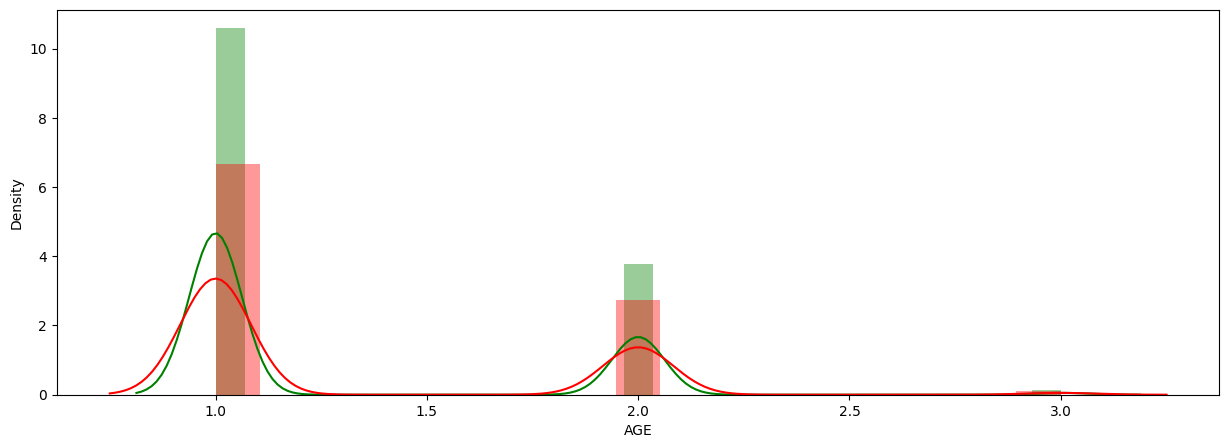

<ipython-input-47-7cd9f96178ad>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-7cd9f96178ad>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




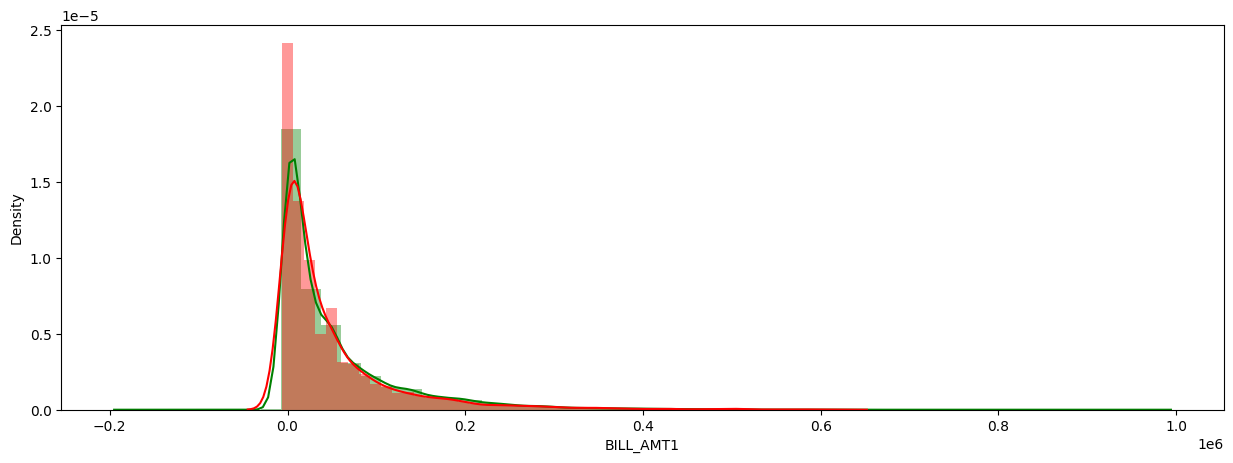

<ipython-input-47-7cd9f96178ad>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-7cd9f96178ad>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




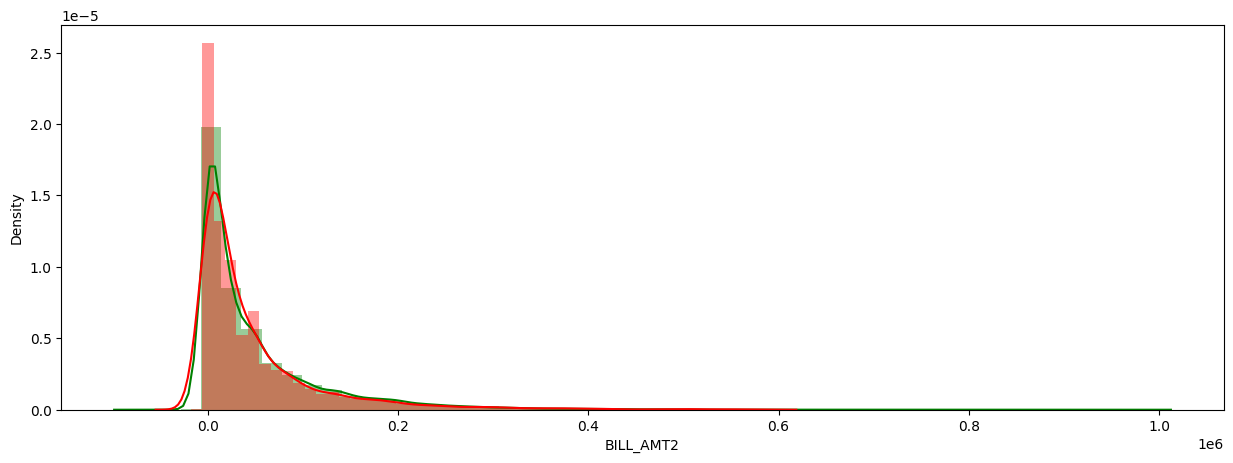

<ipython-input-47-7cd9f96178ad>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-7cd9f96178ad>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




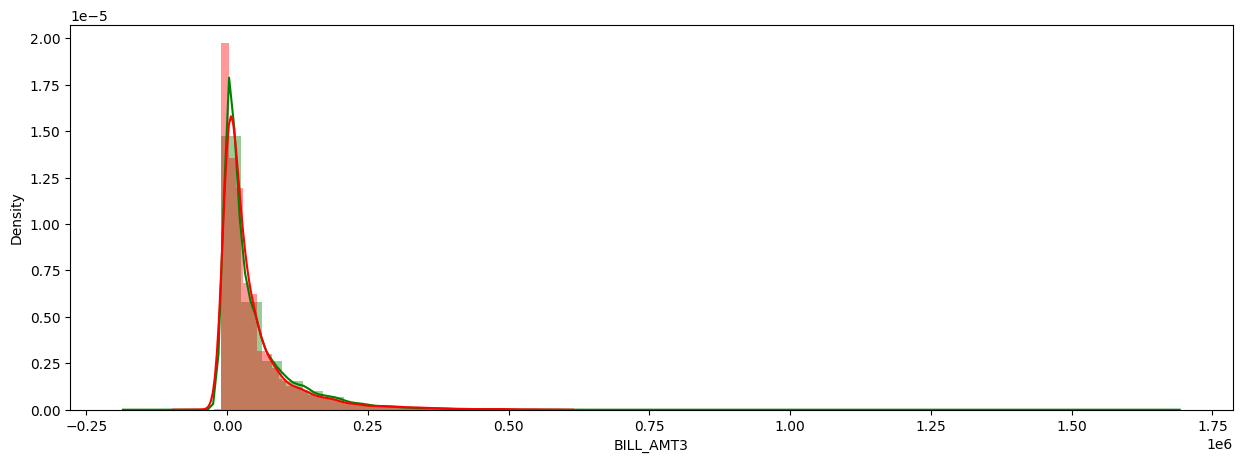

<ipython-input-47-7cd9f96178ad>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-7cd9f96178ad>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




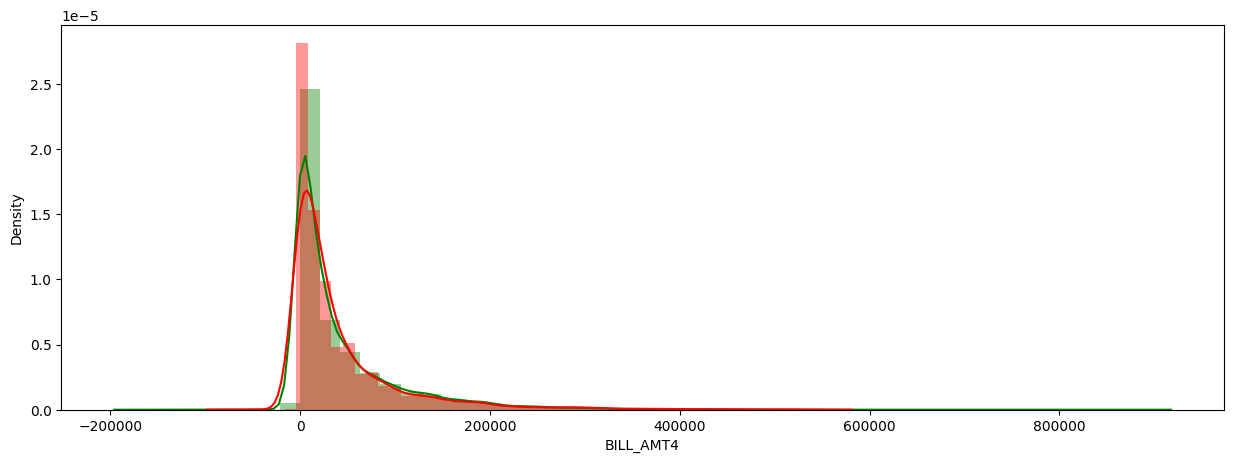

<ipython-input-47-7cd9f96178ad>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-7cd9f96178ad>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




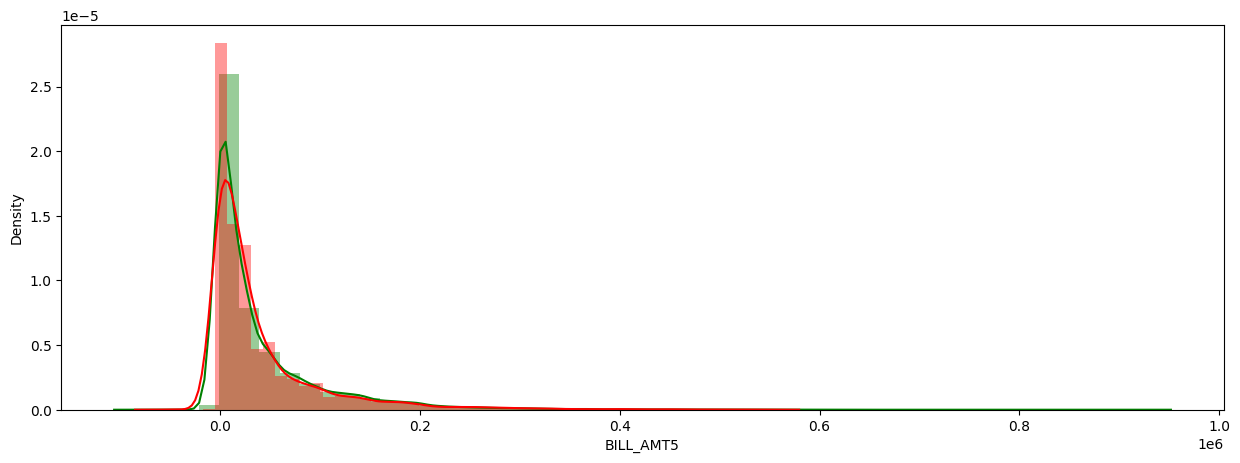

<ipython-input-47-7cd9f96178ad>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-7cd9f96178ad>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




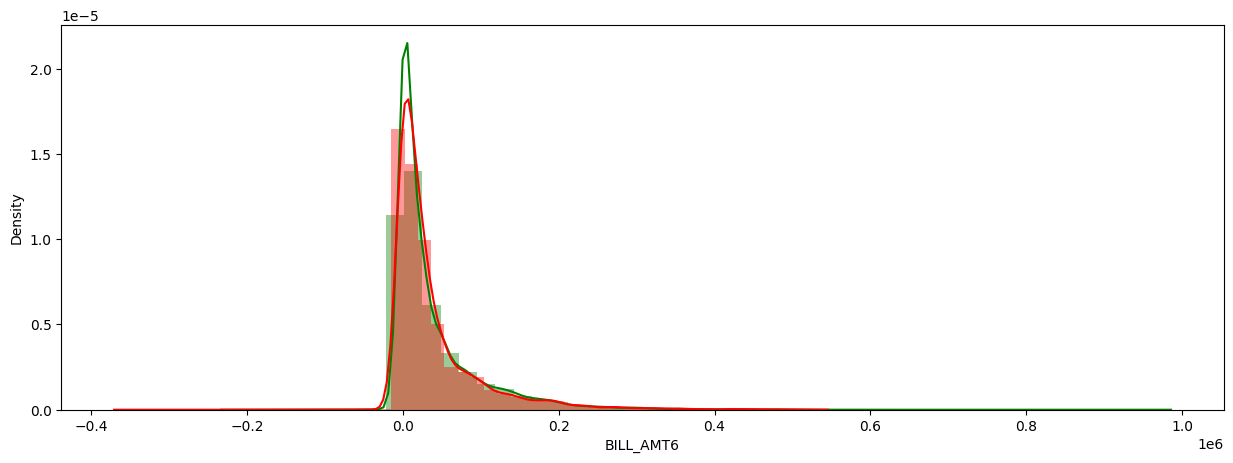

<ipython-input-47-7cd9f96178ad>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-7cd9f96178ad>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




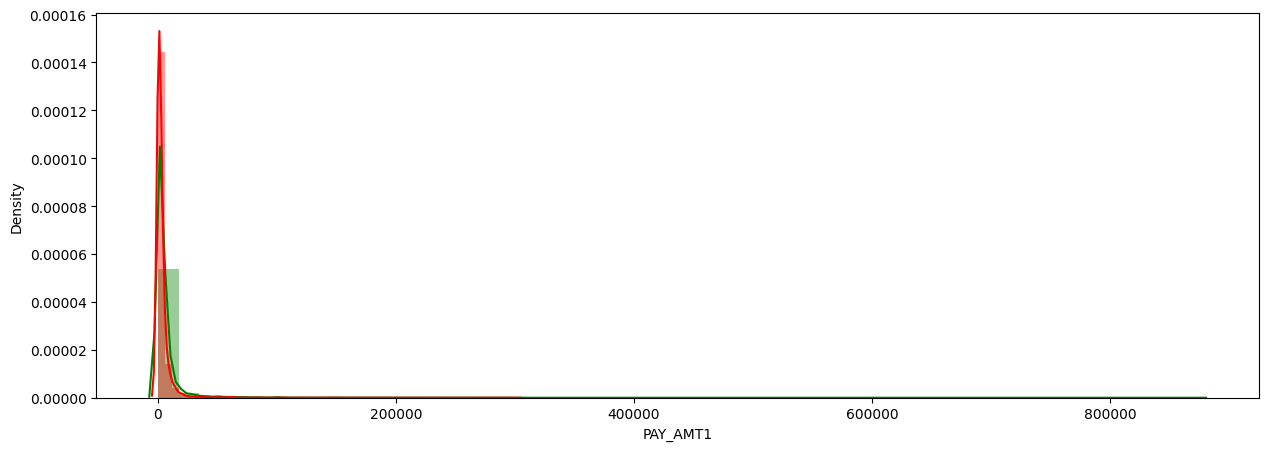

<ipython-input-47-7cd9f96178ad>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-7cd9f96178ad>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




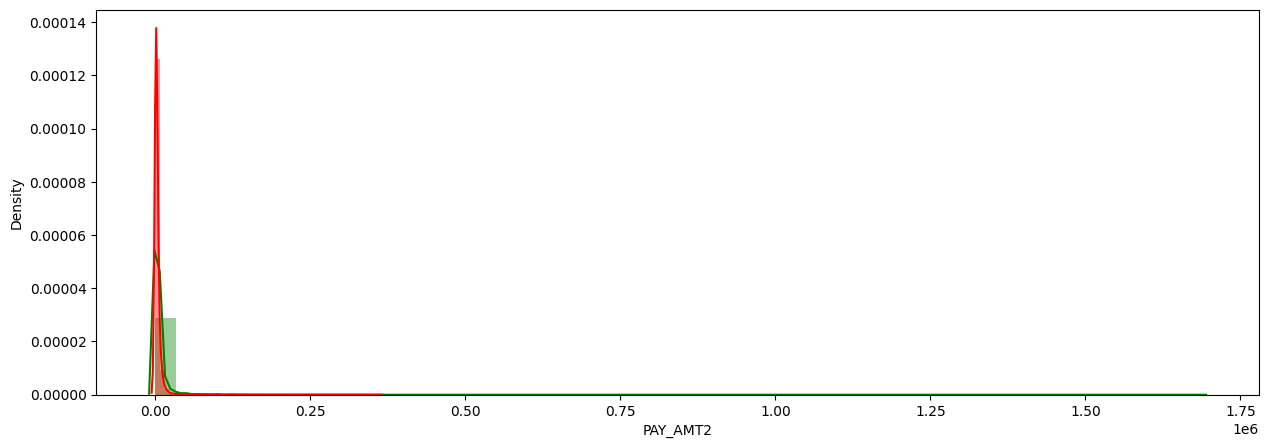

<ipython-input-47-7cd9f96178ad>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-7cd9f96178ad>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




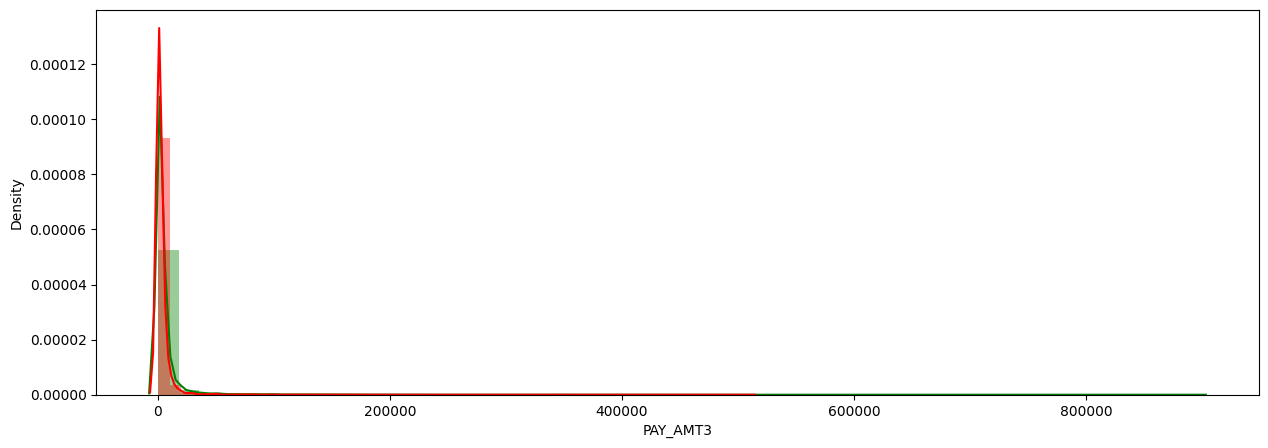

<ipython-input-47-7cd9f96178ad>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-7cd9f96178ad>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




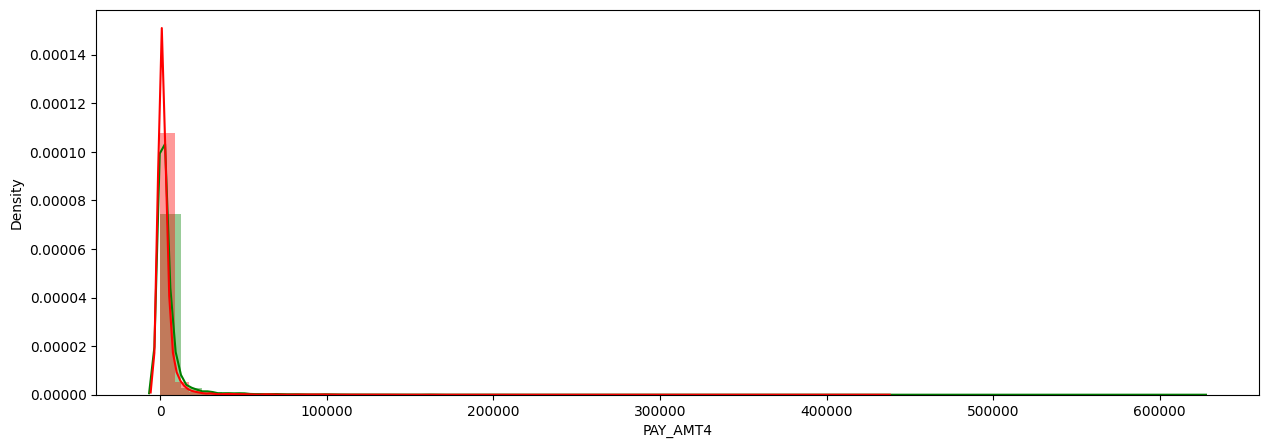

<ipython-input-47-7cd9f96178ad>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-7cd9f96178ad>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




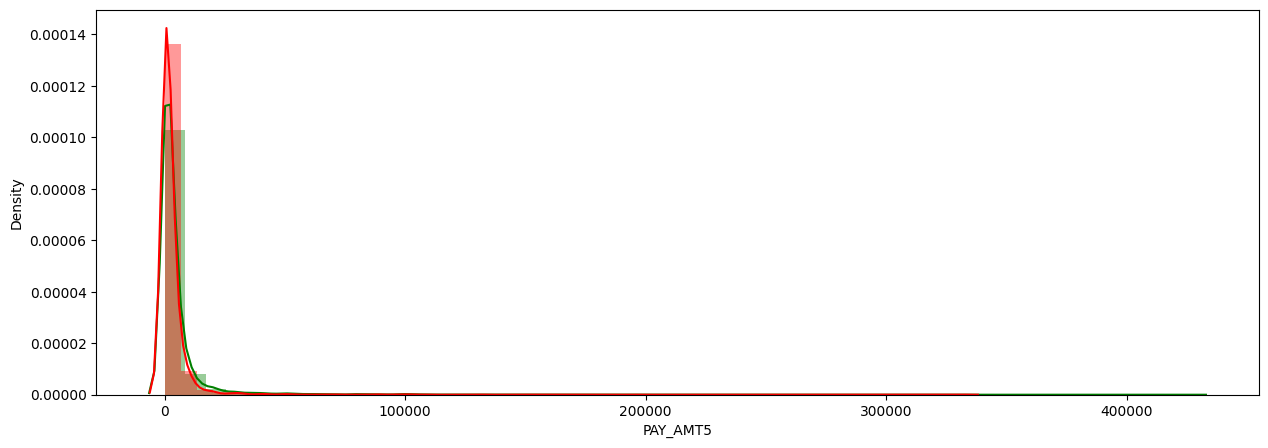

<ipython-input-47-7cd9f96178ad>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-7cd9f96178ad>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




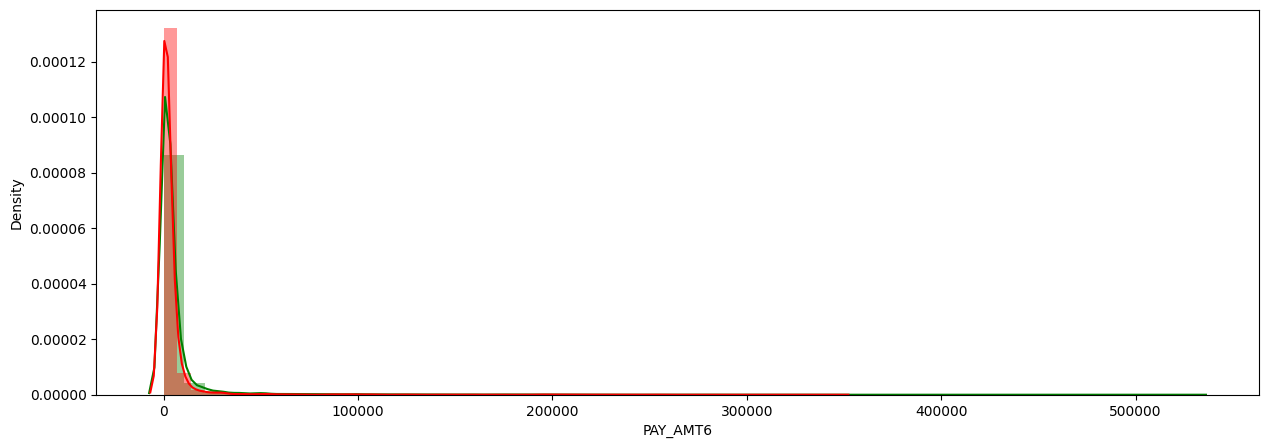

In [47]:
for i in con_col:
  plt.figure(figsize=(15,5))
  sns.distplot(mi0[i],color='g')
  sns.distplot(mi1[i],color='r')
  plt.show()

HEATMAP

In [48]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
ID,1.000000,0.026179,0.018497,0.037659,-0.028208,0.008967,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.231088,-0.111012,0.041214,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.013627,-0.028522,-0.064459,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.037659,-0.231088,0.013627,1.000000,-0.136797,0.189927,0.112593,0.129703,0.122425,0.116531,...,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
MARRIAGE,-0.028208,-0.111012,-0.028522,-0.136797,1.000000,-0.308436,0.018557,0.023620,0.032399,0.031831,...,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.008967,0.041214,-0.064459,0.189927,-0.308436,1.000000,-0.005937,-0.010158,-0.013993,-0.012783,...,0.023358,0.019923,0.020229,0.010929,0.008799,0.013346,0.003552,0.008652,0.001292,0.027047
PAY_0,-0.030575,-0.271214,-0.057643,0.112593,0.018557,-0.005937,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.129703,0.023620,-0.010158,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.122425,0.032399,-0.013993,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.116531,0.031831,-0.012783,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


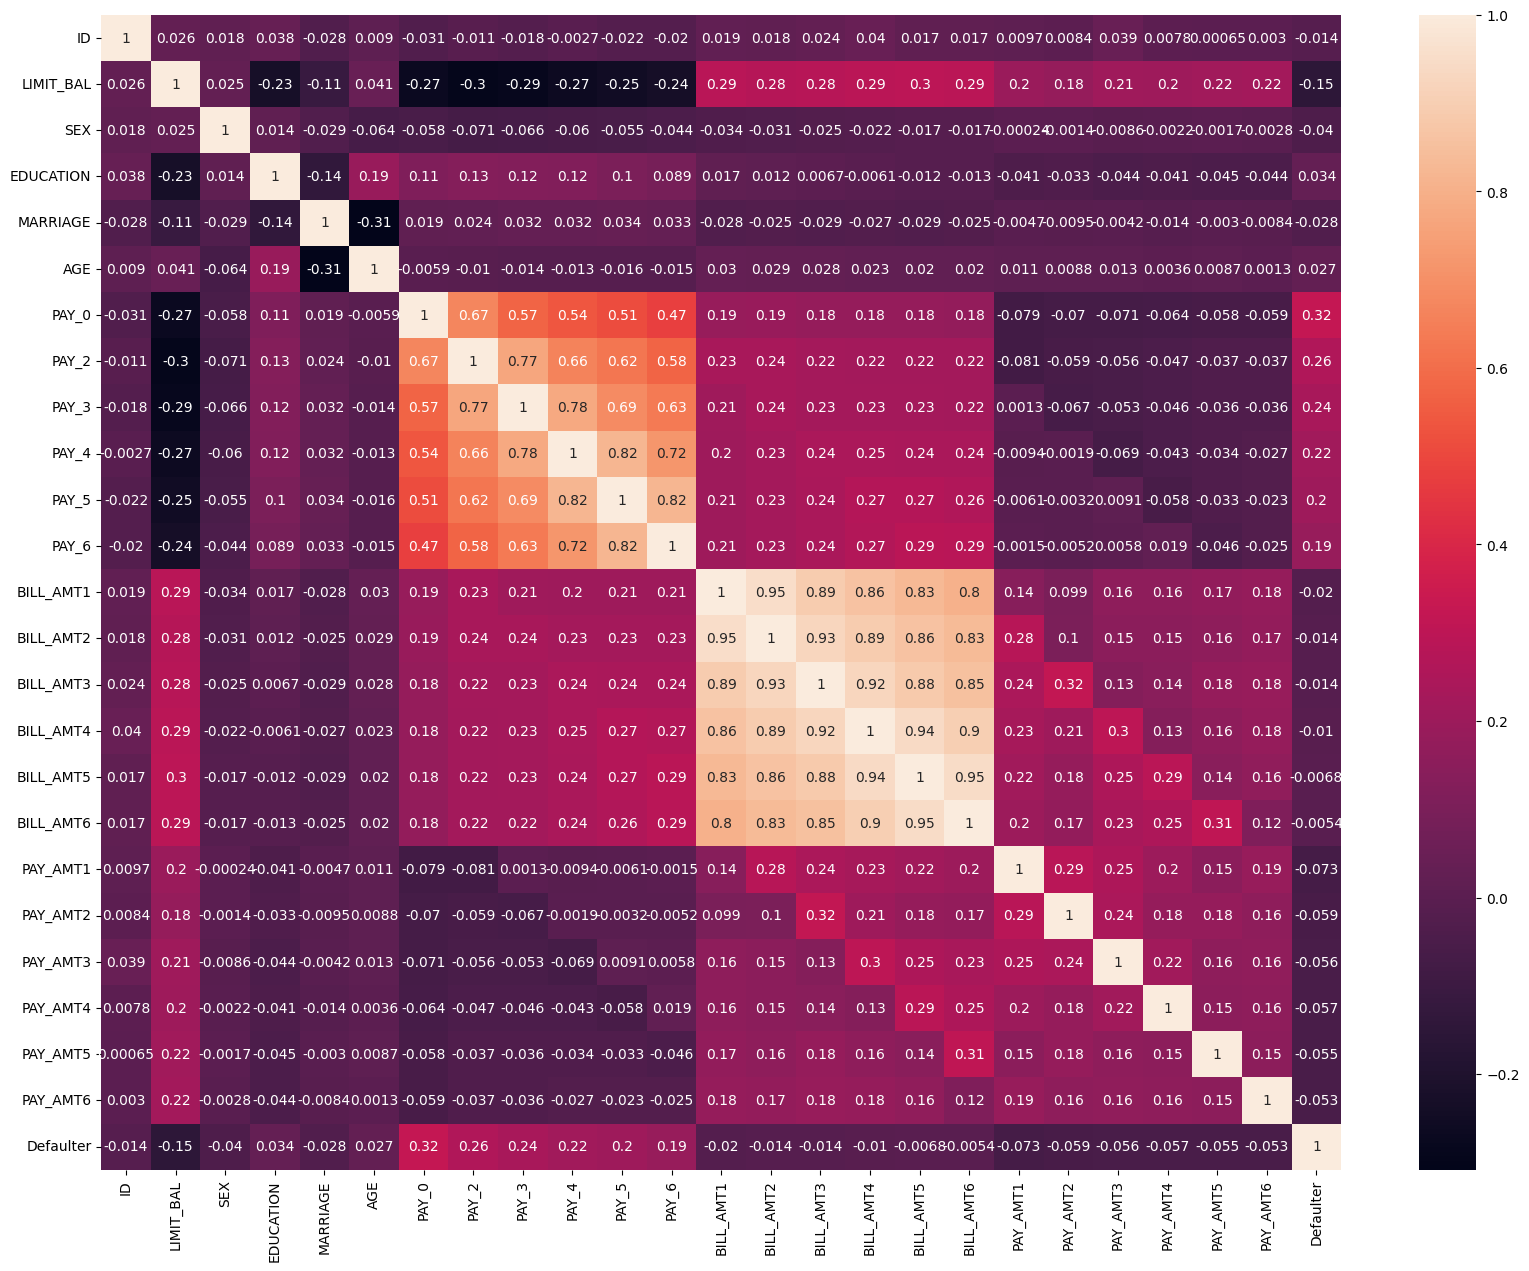

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

**In this heat map payment amount and bill amount correlated itself**

Splitting dataset in dependent and independent variable

In [50]:
X =df.drop('Defaulter',axis=1)
y = df['Defaulter']

Splitting dataset in train test split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [52]:
X_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4936,4937,20000,1,1,2,1,-1,-1,-1,-1,...,390,780,0,0,390,390,780,0,0,0
4788,4789,120000,1,2,1,2,2,0,0,0,...,105262,46605,45590,46204,4449,2731,3000,5000,3000,3000
8447,8448,70000,2,2,2,1,0,0,0,0,...,26103,28342,24894,25272,3003,5106,4026,755,1029,5303
4535,4536,230000,1,2,2,1,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
27563,27564,130000,1,2,2,2,0,0,0,0,...,111780,116357,96936,98173,4000,5000,8000,4000,4000,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17289,17290,170000,2,3,1,1,1,2,0,0,...,20619,19520,5200,0,0,2000,1136,1000,0,36679
5192,5193,330000,2,1,1,2,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
12172,12173,50000,1,2,2,1,0,0,0,0,...,35458,19778,19929,19790,1707,1321,687,705,811,874
235,236,80000,1,1,2,1,-1,-1,-1,-1,...,6848,1719,1378,19942,3983,6853,1719,1378,19942,2418


check if data is imbalance

0    77.88
1    22.12
Name: Defaulter, dtype: float64


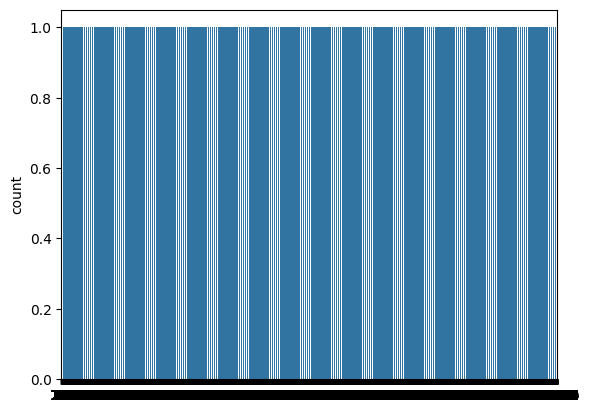

In [58]:
print((df['Defaulter'].value_counts()/df['Defaulter'].shape)*100)
sns.countplot(df['Defaulter'])
plt.show()

the data is imbalance

BALANCE THE DATA

In [59]:
print('Before Oversampling , The shape of train_X: {}'.format(X_train.shape))
print('Before Oversampling ,The shape of train_y: {}'.format(y_train.shape))

Before Oversampling , The shape of train_X: (21000, 24)
Before Oversampling ,The shape of train_y: (21000,)


In [60]:
print('Before Oversampling , The shape of test_X {}'.format(X_test.shape))
print('Before Oversampling , The shape of test_y {}'.format(y_test.shape))

Before Oversampling , The shape of test_X (9000, 24)
Before Oversampling , The shape of test_y (9000,)


In [73]:
smote=SMOTE(sampling_strategy='minority')
X_train_sm,y_train_sm=smote.fit_resample(X_train,y_train)

In [62]:
print('After Oversampling , The shape of train_X: {}'.format(X_train_sm.shape))
print('After Oversampling ,The shape of train_y: {}'.format(y_train_sm.shape))

After Oversampling , The shape of train_X: (32728, 24)
After Oversampling ,The shape of train_y: (32728,)


In [63]:
print('After Oversampling , The shape of test_X: {}'.format(X_test.shape))
print('After Oversampling ,The shape of test_y: {}'.format(y_test.shape))

After Oversampling , The shape of test_X: (9000, 24)
After Oversampling ,The shape of test_y: (9000,)


Now its time to use some algorithms

## **Model using LogisticRegression:**

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [75]:
logistic=LogisticRegression(random_state=42)
logistic.fit(X_train_sm,y_train_sm)
y_pred=logistic.predict(X_test)
acc_1=accuracy_score(y_test,y_pred)
accuracy1=round(acc_1*100,2)
cm=confusion_matrix(y_test,y_pred)

print('Confusion Matrix: \n',cm)
print(accuracy1)

Confusion Matrix: 
 [[4149 2851]
 [ 757 1243]]
59.91


In [76]:
print(classification_report(y_test,y_pred))
print('The accuracy score of logistic regression is {}%'.format(accuracy1))

              precision    recall  f1-score   support

           0       0.85      0.59      0.70      7000
           1       0.30      0.62      0.41      2000

    accuracy                           0.60      9000
   macro avg       0.57      0.61      0.55      9000
weighted avg       0.73      0.60      0.63      9000

The accuracy score of logistic regression is 59.91%


**k nearest neighbour**

In [77]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train_sm,y_train_sm)
y_pred2 = k_neighbors.predict(X_test)
acc_2 = accuracy_score(y_test, y_pred2)
accuracy2=round(acc_2*100,2)
print(classification_report(y_test,y_pred))
print('The accuracy score of k nearest neighbors is {}%'.format(accuracy2))

              precision    recall  f1-score   support

           0       0.85      0.59      0.70      7000
           1       0.30      0.62      0.41      2000

    accuracy                           0.60      9000
   macro avg       0.57      0.61      0.55      9000
weighted avg       0.73      0.60      0.63      9000

The accuracy score of k nearest neighbors is 59.66%



**Naive bayes**

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(X_train_sm, y_train_sm)
y_pred = gnb.predict(X_test)
acc3=metrics.accuracy_score(y_test, y_pred)
accuracy3=round(acc3*100,2)
print(classification_report(y_test,y_pred))
print("Gaussian Naive Bayes model accuracy is {}%".format(accuracy3))

              precision    recall  f1-score   support

           0       0.89      0.16      0.27      7000
           1       0.24      0.94      0.38      2000

    accuracy                           0.33      9000
   macro avg       0.57      0.55      0.32      9000
weighted avg       0.75      0.33      0.29      9000

Gaussian Naive Bayes model accuracy is 32.89%


**Decision tree**

In [79]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_sm,y_train_sm)
y_pred4 = decision_tree.predict(X_test)
acc_4 = accuracy_score(y_test, y_pred4)
score4 = round(acc_4*100,2)
print(classification_report(y_test,y_pred))

print('The accuracy score of Decision tree is {}%'.format(score4))

              precision    recall  f1-score   support

           0       0.89      0.16      0.27      7000
           1       0.24      0.94      0.38      2000

    accuracy                           0.33      9000
   macro avg       0.57      0.55      0.32      9000
weighted avg       0.75      0.33      0.29      9000

The accuracy score of Decision tree is 68.14%


**Random forest classifier**

In [80]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train_sm, y_train_sm)

ran = random_forest.predict(X_train)

y_pred5 = random_forest.predict(X_test)
acc_5 = accuracy_score(y_test, y_pred5)
score5 = round(acc_5*100,2)
print(classification_report(y_test,y_pred))
print('The accuracy score of random forest is {}%'.format(score5))

              precision    recall  f1-score   support

           0       0.89      0.16      0.27      7000
           1       0.24      0.94      0.38      2000

    accuracy                           0.33      9000
   macro avg       0.57      0.55      0.32      9000
weighted avg       0.75      0.33      0.29      9000

The accuracy score of random forest is 78.29%


Random forest give the highest accuracy , now lets do some hyper tunning to increase further the accuracy


**Hyperparameter tuning on random forest algorithm**

In [81]:
rfc = RandomForestClassifier(random_state=1)

params = {'n_estimators': sp_randint(5,30),
          'criterion' : ['gini','entropy'],
          'max_depth' : sp_randint(2,10),
          'min_samples_split' : sp_randint(2,20),
          'min_samples_leaf' : sp_randint(1,20),
          'max_features' : sp_randint(2,18)}

rand_search_rfc = RandomizedSearchCV(rfc, param_distributions=params, random_state=1, cv=3)

rand_search_rfc.fit(X_train_sm,y_train_sm)

rand_search_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 22}

Passing best parameter for the Hyperparameter Tuning

In [82]:
rfc = RandomForestClassifier(**rand_search_rfc.best_params_, random_state=1)

acc=rfc.fit(X_train_sm, y_train_sm)

y_pred = rfc.predict(X_test)
acc_6 = accuracy_score(y_test, y_pred)
score6 = round(acc_6*100,2)
print(classification_report(y_test,y_pred))
print('The accuracy score of random forest is {}%'.format(score6))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      7000
           1       0.47      0.53      0.50      2000

    accuracy                           0.76      9000
   macro avg       0.67      0.68      0.67      9000
weighted avg       0.77      0.76      0.77      9000

The accuracy score of random forest is 76.37%


Conclusion: Using a Random Forest classifier, we can predict with ~78.2%. accuracy, whether a customer is likely to default next month.

The strongest predictors of default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).

Demographics: we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.